# N Body Problem

In physics the problem of two bodies orbiting one another can be solved neatly, and analytically.
Likewise, approximates can be made for a 3 or 4 body system assuming that the additional bodies
have masses much smaller than the original 2. However, as soon as we deal with the problem of
more than 2 bodies of equivalent mass things become chaotic and require numerical methods to
solve them. This is the N-body problem is physics.<br>

The physics of the N-body problem is governed by the equations of gravity so that for the i
th body of the system the force from the other bodies in a system of N-bodies is

$$Fi=M_i a_i=M_i\frac{d^2x}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^2}$$

You have the following system, two stars of equal mass orbit around their common center of mass
a distance of 50 AU apart. <br>
A third star with mass of 1/2 that of the inner two stars orbits the center of mass of the system with a pericenter of 30 AU and a apocenter of 2000 AU. The orbit of the 3rd star is also inclined relative to the plane of the inner two stars by 13 degrees. Starting star 3 at its apocenter, <br>

Do the calculation for a clockwise and counterclockwise rotation for M1 and M2.

<br>

Start your calculation with 1000 timesteps and then explore what occurs when you increase or decrease the number of timesteps. Do you notice any computational glitches? Do you believe your
answers?

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#constants
G=39.478

#M1=M2=M=1 Solar mass
M=1
M1=M
M2=M


#delta(inclination with the z axis)
delta=13*(np.pi/180)

In [24]:
def f(s,t,M3):
    '''Computes the derivative of r and velocity at t=0 for star 3'''
    r=s[0]
    velocity=s[1]
    
    drdt=velocity
    acceleration=G*(M1+M2)*M3/(r*r)
    return np.array([drdt,acceleration],float)


In [25]:
def RK4(s,t,M3):
    '''Solves for r, velocity for star star 3 '''
    rvec=[]
    velocity=[]
    
    h=t[1]-t[0]
    
    for i in t:
        rvec.append(s[0])
        velocity.append(s[1])
        
        k1=h*f(s,i,M3)
        k2=h*f(s+0.5*k1,i+0.5*h,M3)
        k3=h*f(s+0.5*k2,i+0.5*h,M3)
        k4=h*f(s+k3,i+h,M3)
        s=s+((k1+2*k2+2*k3+k4)/6)
    return rvec,velocity

In [26]:
def f12(s,t,star,M3):
    '''Computes the derivative of r and velocity at t=0 for star 1,2'''
    r=s[0]
    velocity=s[1]
    
    r10=25
    r20=r10
    r30=2000
    r12=50
    
    drdt=velocity
    if(star==1):
        r13=np.sqrt(r10*r10+r30*r30-2*r10*r30*np.cos(180-delta))
        acceleration=(G*M1*M2/(r12*r12))+(G*M1*M3/(r13*r13))
        
    else:
        r23=np.sqrt(r20*r10+r30*r30-2*r10*r30*np.cos(delta))
        acceleration=(G*M1*M2/(r12*r12))+(G*M2*M3/(r23*r23))
    return np.array([drdt,acceleration],float)

def RK412(s,t,star,M3):
    '''Solves for r, velocity for star star 1,2 '''
    
    rvec=[]
    velocity=[]
    
    h=t[1]-t[0]
    
    for i in t:
        rvec.append(s[0])
        velocity.append(s[1])
        
        
        if(star==1):
            k1=h*f12(s,i,1,M3)
            k2=h*f12(s+0.5*k1,i+0.5*h,1,M3)
            k3=h*f12(s+0.5*k2,i+0.5*h,1,M3)
            k4=h*f12(s+k3,i+h,1,M3)
            s=s+((k1+2*k2+2*k3+k4)/6)
            
        else:
            k1=h*f12(s,i,2,M3)
            k2=h*f12(s+0.5*k1,i+0.5*h,2,M3)
            k3=h*f12(s+0.5*k2,i+0.5*h,2,M3)
            k4=h*f12(s+k3,i+h,2,M3)
            s=s+((k1+2*k2+2*k3+k4)/6)
    return rvec,velocity

In [27]:
##############################INITIAL CONDITIONS#########################################
#star 1----------------------------------------------------------------------------------
#Initial r
r10=25

#initial velocity
v10=np.sqrt(G*M/r10)

#initial acceleration
a10=v10*v10/r10
s1=np.array([r10,v10])

#star2-----------------------------------------------------------------------------------
#initial r
r20=r10

#initial velocity
v20=v10

#initial acceleration
a20=v20*v20/r20

#star3----------------------------------------------------------------------------------
r0=2000
v0=np.sqrt(G*(M1+M2)/r0)
a0=v0*v0/r0

#array s with initial r and v values
s=np.array([r0,v0])

In [33]:
def calculate(N,m3):
    '''Calculates r,v,a for stars 1,2,3 and produce plots'''
    '''Returns 2 figures, fig-r vs t in xyz planes and fig1-velocity vs t,acceleration vs t'''
    #For star 3
    M3=m3
    #semi-major axis
    a=2030/2

    #epicenter
    b=np.sqrt(2000*30)

    #period of star 3
    p=np.sqrt((a*a*a)/(M1+M2+M3))#timesteps

    N=1000

    #time star 3
    t=np.linspace(0,p,N)

    #If clockwise, then 1. For anticlockwise, clockwise=0
    clockwise=1
    if(clockwise==0):
    #theta 
        theta=np.linspace(0,2*np.pi,N)

    else:
        theta=np.linspace(2*np.pi,0,N)


    #########calculation of r,v,a#################################################################
    #star1----------------------------------------------------------------------------------------
    #r1 and v1 for star 1
    r1,v1=RK412(s1,t,1,M3)

    #Acceleration for star 1
    a1_top=[M1*i*i for i in v1]
    a1=[a1_top/(i*i) for  i in r1]

    #position vectors of star 1
    x1=r1*np.cos(theta)
    y1=r1*np.sin(theta)
    z1=np.full(N,0.0)

    #velocity vectors of star 1
    v1_x=v1*np.cos(theta)
    v1_y=v1*np.sin(theta)
    v1_z=np.full(N,0.0)

    # a1_x=a1*np.cos(theta)
    # a1_y=a1*np.sin(theta)
    # a1_z=np.full(N,0.0)

    #star2------------------------------------------------------------------------------------------

    s2=np.array([r20,v20])
    #r2 and v2 for star 2 calculated using rungecutta method
    r2,v2=RK412(s1,t,2,M3)

    #Acceleration of star 2
    a2_top=[M2*i*i for i in v2]
    a2=[a2_top/(i*i) for i in r2]


    #Position vectors of star 2
    x2=r2*np.cos(theta+np.pi)
    y2=r2*np.sin(theta+np.pi)
    z2=np.full(N,0.0)

    #Velocity vectors of star 2
    v2_x=v1*np.cos(theta+np.pi)
    v2_y=v1*np.sin(theta+np.pi)
    v2_z=np.full(N,0.0)

    #Acceleration vectors of star2
    # a2_x=a1*np.cos(theta+np.pi)
    # a2_y=a1*np.sin(theta+np.pi)
    # a2_z=np.full(N,0.0)

    #star3---------------------------------------------------------------------------------------
    #r and velocity of star 3
    r3,velocity=RK4(s,t,M3)

    #Acceleration of star 3
    a3=[M3*i*i for i in velocity]
    acceleration=[a3/i for i in r3]

    #Position vectors for star 3
    x3=np.zeros(N)
    y3=r3*np.cos(theta)*np.cos(delta)
    z3=r3*np.sin(theta)*np.sin(delta)


    # v3_x=np.zeros(N)
    # v3_y=velocity*np.cos(theta)*np.cos(delta)
    # v3_z=velocity*np.sin(theta)*np.sin(delta)

    # a3_x=np.zeros(N)
    # a3_y=acceleration*np.cos(theta)*np.cos(delta)
    # a3_z=acceleration*np.sin(theta)*np.sin(delta)


    ########plots#################################################################################

    fig=plt.figure(figsize=(20,4))
    legend=['Star 1','Star 2','Star 3']

    ax=fig.add_subplot(131)
    ax.scatter(x1,y1,c='r',marker='.',s=1)
    ax.scatter(x2,y2,c='b',marker='.',s=1)
    ax.scatter(x3,y3,c='g',marker='.',s=1)
    ax.legend(legend)
    ax.set_title('x vs y')
    ax.set_xlabel('x [AU]')
    ax.set_ylabel('y [AU]')


    ax1=fig.add_subplot(132)
    ax1.scatter(y1,z1,c='r',marker='.',s=1)
    ax1.scatter(y2,z2,c='b',marker='.',s=1)
    ax1.scatter(y3,z3,c='g',marker='.',s=1)
    ax1.set_title('y vs z')
    ax1.set_xlabel('y [AU]')
    ax1.set_ylabel('Z [AU]')
    ax1.legend(legend)

    ax2=fig.add_subplot(133)
    ax2.scatter(x1,z1,c='r',marker='.',s=1)
    ax2.scatter(x2,z2,c='b',marker='.',s=1)
    ax2.scatter(x3,z3,c='g',marker='.',s=1)
    ax2.legend(legend)
    ax2.set_title('x vs z')
    ax2.set_xlabel('x [AU]')
    ax2.set_ylabel('z [AU]')

    plt.show()

    title='|Velocity| vs Time (M3={}) and N={}'.format(M3,N)
    fig1=plt.figure(figsize=(20,5))
    ax3=fig1.add_subplot(121)

    ax3.scatter(t,v1,c='r',marker='.',s=1)
    ax3.scatter(t,v2,c='b',marker='.',s=1)
    ax3.scatter(t,velocity,c='g',marker='.',s=1)

    ax3.set_title(title,size=15)
    ax3.set_xlabel('Time [years]',size=14)
    ax3.set_ylabel('Velocity [$AU$ $yr^{-1}$]',size=14)


    ax4=fig1.add_subplot(122)
    ax4.plot(t,a1,'r.')
    ax4.plot(t,a2,'b.')
    ax4.plot(t,acceleration,'g.')

    ax4.set_title('|Acceleration| vs Time (M3={}) and N={}'.format(M3,N),size=15)
    ax4.set_xlabel('Time [years]',size=14)
    ax4.set_ylabel('Acceleration [$AU$ $yr^{-2}$]',size=14)

    plt.show()
    return fig,fig1

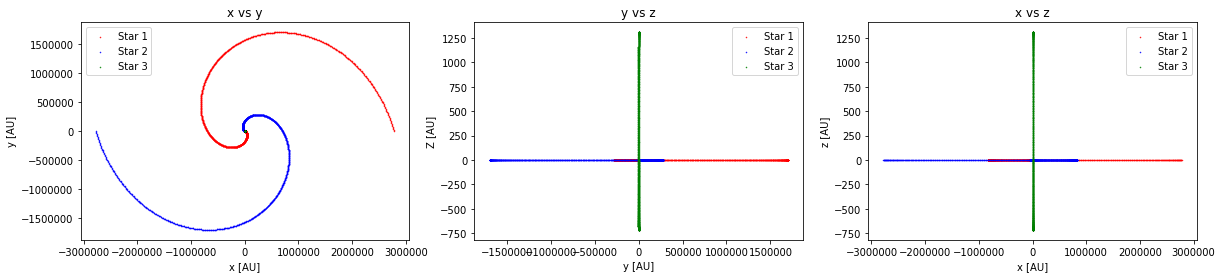

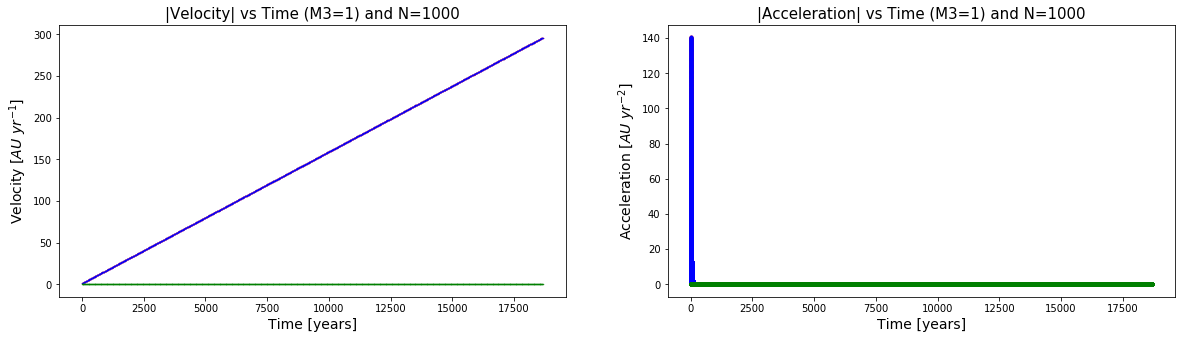

(<Figure size 1440x288 with 3 Axes>, <Figure size 1440x360 with 2 Axes>)

In [31]:
calculate(1000,1)

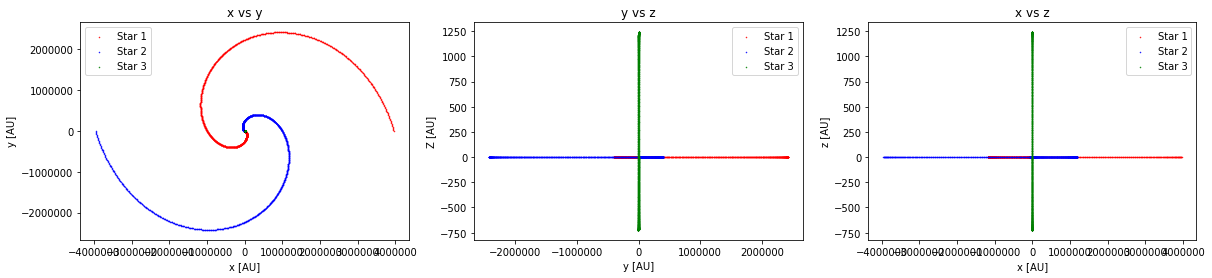

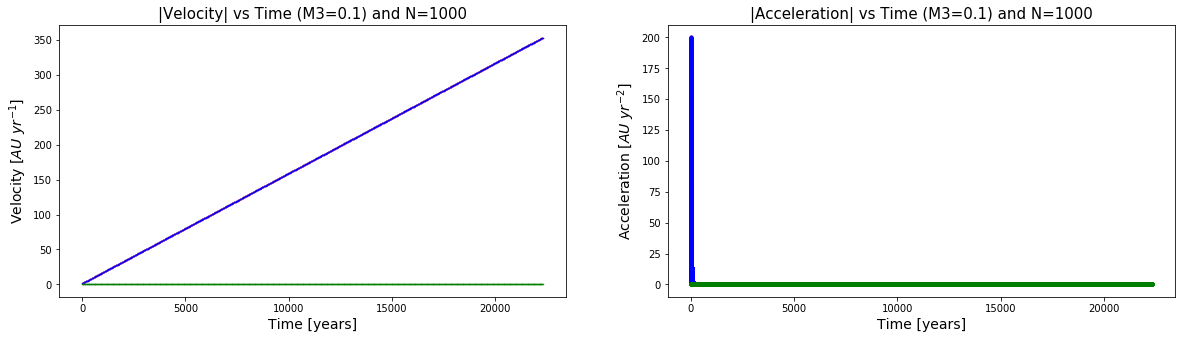

(<Figure size 1440x288 with 3 Axes>, <Figure size 1440x360 with 2 Axes>)

In [32]:
calculate(1000,0.1)

In [ ]:
fig1=plt.figure(figsize=(20,4))


ax3=fig1.add_subplot(131)
ax3.scatter(t,v1_x,c='r',marker='.',s=1)
ax3.scatter(t,v2_x,c='b',marker='.',s=1)
ax3.scatter(t,v3_x,c='g',marker='.',s=1)
ax3.set_title('$v_x$ vs t')
ax3.set_xlabel('t [years]')
ax3.set_ylabel('v [AU $yr^{-1}$]')
ax3.legend(legend)

ax4=fig1.add_subplot(132)
ax4.scatter(t,v1_y,c='r',marker='.',s=1)
ax4.scatter(t,v2_y,c='b',marker='.',s=1)
ax4.scatter(t,v3_y,c='g',marker='.',s=1)
ax4.set_title('$v_y$ vs t')
ax4.set_xlabel('t [years]')
ax4.set_ylabel('v [AU $yr^{-1}$]')
ax4.legend(legend)

ax5=fig1.add_subplot(133)
ax5.scatter(t,v1_z,c='r',marker='.',s=1)
ax5.scatter(t,v2_z,c='b',marker='.',s=1)
ax5.scatter(t,v3_z,c='g',marker='.',s=1)
ax5.set_title('$v_z$ vs t')
ax5.set_xlabel('t [years]')
ax5.set_ylabel('v [AU $yr^{-1}$]')
ax5.legend(legend)
plt.show()


In [ ]:
# fig2=plt.figure(figsize=(20,4))

# ax6=fig2.add_subplot(131)
# ax6.scatter(t,a1_x,c='r',marker='.',s=1)
# ax6.scatter(t,a2_x,c='b',marker='.',s=1)
# ax6.scatter(t,a3_x,c='g',marker='.',s=1)
# ax6.set_title('$a_x$ vs t')
# ax6.set_xlabel('t [years]')
# ax6.set_ylabel('a [AU $yr^{-2}$]')
# ax6.legend(legend)

# ax7=fig2.add_subplot(132)
# ax7.scatter(t,a1_y,c='r',marker='.',s=1)
# ax7.scatter(t,a2_y,c='b',marker='.',s=1)
# ax7.scatter(t,a3_y,c='g',marker='.',s=1)
# ax7.set_title('$a_y$ vs t')
# ax7.set_xlabel('t [years]')
# ax7.set_ylabel('a [AU $yr^{-2}$]')
# ax7.legend(legend)

# ax8=fig2.add_subplot(133)
# ax8.scatter(t,a1_z,c='r',marker='.',s=1)
# ax8.scatter(t,a2_z,c='b',marker='.',s=1)
# ax8.scatter(t,a3_z,c='g',marker='.',s=1)
# ax8.set_title('$a_z$ vs t')
# ax8.set_xlabel('t [years]')
# ax8.set_ylabel('a [AU $yr^{-2}$]')
# ax8.legend(legend)
# plt.show()
